In [ ]:
from google.colab import auth
import gspread
from google.auth import default
auth.authenticate_user()
creds, _=default()
gc= gspread.authorize(creds)


In [ ]:
worksheet=gc.open('DLdata1').sheet1
data= worksheet.get_all_values()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
dataset1=pd.DataFrame(data[1:],columns=data[0])

In [ ]:
dataset1

,Input1,Output1
0,1,11
1,2,22
2,3,33
3,4,44
4,5,55
5,6,66
6,7,77
7,8,88
8,9,99
9,10,110


In [ ]:
dataset1=dataset1.astype({'Input1' : 'float'})
dataset1=dataset1.astype({'Output1' : 'float'})

In [ ]:
dataset1.head()

,Input1,Output1
0,1.0,11.0
1,2.0,22.0
2,3.0,33.0
3,4.0,44.0
4,5.0,55.0


In [ ]:
X=dataset1[["Input1"]].values
Y=dataset1[["Output1"]].values

In [ ]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.]])

In [ ]:
X_train,X_test,Y_train,Y_test=(train_test_split(X,Y,test_size=0.33,random_state=20))

In [ ]:
Scaler=MinMaxScaler()
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1= Scaler.transform(X_train)

In [ ]:
ai_brain = Sequential([
    Dense(5,activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dense(1)
])

In [ ]:
ai_brain.compile(optimizer = 'rmsprop', loss = 'mse')

In [ ]:
history=ai_brain.fit(X_train1,Y_train,epochs = 3500)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 9ms/step - loss: 4234.8560
Epoch 1002/3500
1/1 [==============================] - 0s 8ms/step - loss: 4225.8618
Epoch 1003/3500
1/1 [==============================] - 0s 8ms/step - loss: 4216.8672
Epoch 1004/3500
1/1 [==============================] - 0s 8ms/step - loss: 4207.8716
Epoch 1005/3500
1/1 [==============================] - 0s 7ms/step - loss: 4198.8770
Epoch 1006/3500
1/1 [==============================] - 0s 10ms/step - loss: 4189.8823
Epoch 1007/3500
1/1 [==============================] - 0s 10ms/step - loss: 4180.8862
Epoch 1008/3500
1/1 [==============================] - 0s 7ms/step - loss: 4171.8911
Epoch 1009/3500
1/1 [==============================] - 0s 8ms/step - loss: 4162.8965
Epoch 1010/3500
1/1 [==============================] - 0s 9ms/step - loss: 4153.9019
Epoch 1011/3500
1/1 [==============================] - 0s 6ms/step - loss: 4144.9058
Epoch 1012/3500
1/1 [=======

In [ ]:
ai_brain.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loss=pd.DataFrame(ai_brain.history.history)

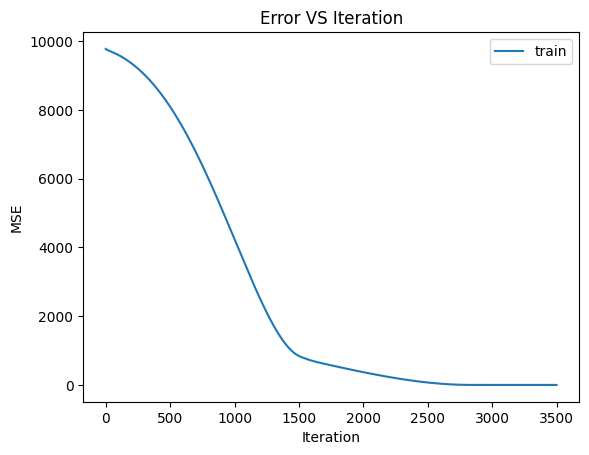

In [ ]:
import matplotlib.pyplot as plt
plt.title("Error VS Iteration")
plt.ylabel('MSE')
plt.xlabel('Iteration')
plt.plot(loss)
plt.legend(['train'] )
plt.show()

In [ ]:
X_test=Scaler.transform(X_test)

In [ ]:
ai_brain.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 101ms/step - loss: 0.0132


0.01323277410119772

In [ ]:
X_a=[[21]]

In [ ]:
X_a_1=Scaler.transform(X_a)

In [ ]:
ai_brain.predict(X_a_1)

1/1 [==============================] - 0s 94ms/step


array([[231.15628]], dtype=float32)

In [ ]:
X_b=[[30]]
X_b_1=Scaler.transform(X_b)
ai_brain.predict(X_b_1)


1/1 [==============================] - 0s 18ms/step


array([[330.21228]], dtype=float32)

In [ ]:
X_c=[[72]]
X_c_1=Scaler.transform(X_c)
ai_brain.predict(X_c_1)


1/1 [==============================] - 0s 21ms/step


array([[792.4739]], dtype=float32)